In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.fft import fft, ifft

## Making the Window

In [3]:
def makeWindow(dim, theta, r):
    window = np.zeros((dim, dim, dim))
    x_cen = dim/2
    y_cen = dim/2
    z_cen = -r/np.tan(theta)
    axis = np.array([0, 0, 1])
    for i in range(dim):
        for j in range(dim):
            for k in range(1, dim):
                test = np.array([i-x_cen, j-y_cen, k-z_cen])
                cosphi = np.dot(test, axis)/np.linalg.norm(test)
                if(cosphi > abs(np.cos(theta))):
                    window[i, j, k] =  1
    return window

In [4]:
window = makeWindow(N, np.pi/8, N/8)

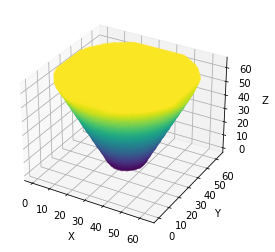

In [5]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data = window
x, y, z = data.nonzero()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(x, y, z, c=z, alpha=.5)

## Reading Power Spectrum Data

In [12]:
# Open data file
filepath = "C:/Users/kales/OneDrive/Desktop/Physics Research/Bispectrum Measurement/test_pk.txt"
file = open(filepath, "r")

# Define variables
k_in, P_in = np.loadtxt(filepath, unpack=True)
N = 64
b = 0
f = 1

# Create full power spectrum from data
P_c = lambda x : np.interp(x, k_in, P_in)
k_freq = np.fft.fftfreq(N)
kx, ky, kz = np.meshgrid(k_freq, k_freq, k_freq)
mu = kz / np.sqrt(kx**2 + ky**2 + kz**2)
mu[np.isnan(mu)] = 0
P_Mat = np.sqrt((b + f*mu**2)*P_c(np.sqrt(kx**2 + ky**2 + kz**2)))*np.exp(1j*2*np.pi*np.random.random([N, N, N]))

# Applies window to position data
theta = np.pi/8
r = N/8
Pos_Mat = ifft(P_Mat)
window = makeWindow(N, theta, r)
Pos_Mat_Wind = window*Pos_Mat
P_in_Recon = fft(Pos_Mat_Wind) 

<ipython-input-12-7acf6adda424>:11: RuntimeWarning: invalid value encountered in true_divide
  mu = kz / np.sqrt(kx**2 + ky**2 + kz**2)


In [13]:
Prkx = []
Prky = []
Prkz = []
Pikx = []
Piky = []
Pikz = []
for i in range(N):
    Prkx.append(np.linalg.norm(P_in_Recon[i, :, :]))
    Prky.append(np.linalg.norm(P_in_Recon[:, i, :]))
    Prkz.append(np.linalg.norm(P_in_Recon[:, :, i]))
    Pikx.append(np.linalg.norm(P_Mat[i, :, :]))
    Piky.append(np.linalg.norm(P_Mat[:, i, :]))
    Pikz.append(np.linalg.norm(P_Mat[:, :, i]))

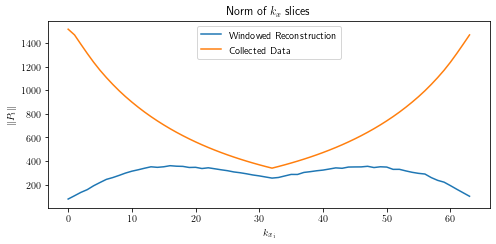

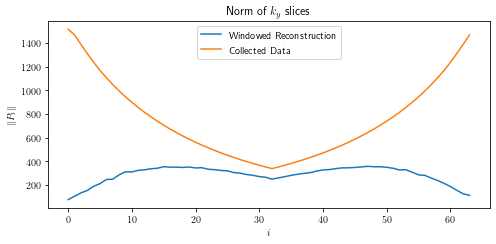

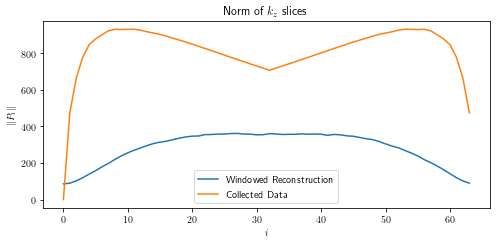

In [14]:
plt.rcParams['text.usetex'] = True
plt.plot(Prkx, label = "Windowed Reconstruction")
plt.plot(Pikx, label = "Collected Data")
plt.title("Norm of $k_x$ slices")
plt.ylabel("$\|P_{i}\|$")
plt.xlabel("$k_{x_i}$")
plt.legend()
plt.show()

plt.plot(Prky, label = "Windowed Reconstruction")
plt.plot(Piky, label = "Collected Data")
plt.title("Norm of $k_y$ slices")
plt.ylabel("$\|P_{i}\|$")
plt.xlabel("$i$")
plt.legend()
plt.show()

plt.plot(Prkz, label = "Windowed Reconstruction")
plt.plot(Pikz, label = "Collected Data")
plt.title("Norm of $k_z$ slices")
plt.ylabel("$\|P_{i}\|$")
plt.xlabel("$i$")
plt.legend()
plt.show()